## Classification done by :
* Bag of words
* tfidf
* N-grams

In [15]:
# Loading necessary modules
import pandas as pd              # for data processing; csv file i/o (pd.read_csv)
import numpy as np               # for linear algebra
import matplotlib.pyplot as plt  # for visualization
%matplotlib inline

In [16]:
# Loading the dataset
tweet_df = pd.read_csv('C:/Users/sande/Major Project/Dataset/climate_change_tweet.csv',encoding="ISO-8859-1")
df_without_preprocess = pd.read_csv('C:/Users/sande/Major Project/Dataset/climate_change_tweet.csv',encoding = "ISO-8859-1")

In [17]:
#tweet_df = tweet_df.dropna(how='any')
tweet_df.head()
tweet_df.tail()

,tweet,existence,existence_confidence
6092,Climate change is real.,Yes,1.0
6093,global warming is a good thing,No,1.0
6094,Climate change is real. Science is real. Pleas...,Yes,1.0
6095,RT @nyc_erik: Climate change is REAL.,Yes,1.0
6096,99.9% of scientists agree climate change is ha...,NaN,1.0


In [23]:
print("type of climate tweet text: ", type(tweet_df['tweet']))
tweet_df = tweet_df.dropna(how='any')


type of climate tweet text:  <class 'pandas.core.series.Series'>


In [27]:
print(len(tweet_df))
tweet_df.existence.replace(['Yes', 'No', 'Y', 'N'], ['yes', 'no', 'yes', 'no'], inplace=True)
tweet_df = tweet_df.reset_index(drop=True)

4231


In [28]:
tweets = []
labels = []
for i, label in enumerate(tweet_df['existence']):
    tweets.append(tweet_df['tweet'][i])
    if label == 'no':
        labels.append(0)
    else:
        labels.append(1)

In [29]:
tweets = np.asarray(tweets)
labels = np.asarray(labels)

In [30]:
print("number of texts :" , len(tweets))
print("number of labels: ", len(labels))

number of texts : 4231
number of labels:  4231


In [31]:
print(type(tweets))

<class 'numpy.ndarray'>


In [32]:
print(tweets[0])

Global warming report urges governments to act|BRUSSELS, Belgium (AP) The world faces increased hunger and  [link]


In [33]:
print(np.unique(labels))
print(np.bincount(labels))

[0 1]
[1115 3116]


In [34]:
3116/1115    #More positive

2.7946188340807177

In [35]:
np.random.seed(42)
# shuffle data
indices = np.arange(tweet_df.shape[0])
np.random.shuffle(indices)
tweets = tweets[indices]
labels = labels[indices]

# we will use 80% of data as training, 20% as validation data
total_training_samples = int(4231 * .8)
total_validation_samples = int(4231 - total_training_samples)
# sanity check
print(len(tweets) == (total_training_samples + total_validation_samples))
print(" training data {0}, validation data {1} ".format(total_training_samples, total_validation_samples))

tweets_train = tweets[:total_training_samples]
y_train = labels[:total_training_samples]
tweets_test = tweets[total_training_samples:]
y_test = labels[total_training_samples:]

True
 training data 3384, validation data 847 


## Bag of words
#### Transform texts into bag of words matrix(number of columns == number of unique words, number of rows == total set 

In [36]:
# Example
sample = ["It is hot today and I does not like it, ", 
               "he like burger"]
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
# tokenizing the sample (split the sample text into each unique word)
vect.fit(sample)
print("tokenization")
print(vect.vocabulary_, "\n")

# transform document into a matrix(the number indicates the number of words showing up in the document)
bag_of_words = vect.transform(sample)
print("Transformed sparse matrix is: ")
print(bag_of_words.toarray())

tokenization
{'it': 6, 'is': 5, 'hot': 4, 'today': 9, 'and': 0, 'does': 2, 'not': 8, 'like': 7, 'he': 3, 'burger': 1} 

Transformed sparse matrix is: 
[[1 0 1 0 1 1 2 1 1 1]
 [0 1 0 1 0 0 0 1 0 0]]


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(tweets_train)
X_train = vect.transform(tweets_train)
print(repr(X_train))

<3384x9056 sparse matrix of type '<class 'numpy.int64'>'
	with 56691 stored elements in Compressed Sparse Row format>


In [38]:
X_train.shape

(3384, 9056)

In [39]:
X_test = vect.transform(tweets_test)

In [40]:
np.bincount(y_train)

array([ 889, 2495], dtype=int64)

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train, y_train)

In [42]:
print(grid.best_estimator_)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [43]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
print("accuracy is: ", grid.score(X_test, y_test))

accuracy is:  0.82880755608


In [44]:
confusionMatrix1 = confusion_matrix(y_test, pred_logreg)
print(confusionMatrix1)

[[135  91]
 [ 54 567]]


In [45]:
#Improve
#check vocab
features_names = vect.get_feature_names()
print(len(features_names))
print("\n")
# print first 20 features
print(features_names[:20])
print("\n")
# print last 20 features
print(features_names[-20:])
print("\n")
# print every 50th word
print(features_names[::400])

9056


['00', '000', '01', '01q', '02', '025557', '04', '05', '08', '09', '0b6ih', '0l3up', '0ugj', '0x5d38b30', '10', '100', '1001', '100s', '1010', '10239']


['yyupfmh', 'yzxap7c', 'z3igz', 'z8ka', 'zanieladie', 'zaqzaqat', 'zbepwx', 'zd', 'zeal', 'zealand', 'zealot', 'zener39', 'zerogreenhouse', 'ziza', 'zoeart', 'zoecaron', 'zogme', 'zs', 'ztf', 'zunia']


['00', '25w56lp', '9qj27x', 'alaska', 'aul3c2', 'bizwire', 'call', 'coda', 'cyyyvx', 'dnc', 'evidence', 'gaaaah', 'hitting', 'jamisondague', 'loses', 'mybookstop', 'patrickc', 'punch', 'saarc', 'sometimes', 'their', 'usw', 'x6cyd']


In [46]:
# We will use only the words that appear in at least 3 tweets -- In other words, we will use frequent words which are also likely to be in the test set
# min_df controls this condition(min_df=3 means pick up words which appear
# at least 3 documents)
vect = CountVectorizer(min_df=3).fit(tweets_train)
X_train = vect.transform(tweets_train)
X_test = vect.transform(tweets_test)
print(repr(X_train))

<3384x2476 sparse matrix of type '<class 'numpy.int64'>'
	with 48810 stored elements in Compressed Sparse Row format>


In [47]:
features_names = vect.get_feature_names()
print(len(features_names))
print("\n")
# print first 20 features
print(features_names[:20])
print("\n")
# print last 20 features
print(features_names[-20:])
print("\n")
# print every 50th word
print(features_names[::400])

2476


['00', '000', '02', '04', '09', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1992', '1m', '1st', '20']


['xrl', 'ya', 'yahoo', 'yeah', 'year', 'years', 'yeg8t', 'yes', 'yesterday', 'yet', 'yf34stp', 'york', 'yorkers', 'you', 'your', 'youth', 'youtu', 'youtube', 'yr', 'yup']


['00', 'carbon', 'ethanol', 'investigate', 'orleans', 'snowmaggedon', 'whole']


In [48]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train, y_train)

In [49]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
print("accuracy is: ", grid.score(X_test, y_test))

accuracy is:  0.826446280992


In [50]:
confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[125 101]
 [ 46 575]]


In [51]:
# remove stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words is :", len(ENGLISH_STOP_WORDS), "\n")
print("Examples: ", list(ENGLISH_STOP_WORDS)[::10])

Number of stop words is : 318 

Examples:  ['each', 'nevertheless', 'when', 'becomes', 'formerly', 'meanwhile', 'down', 'then', 'three', 'yourself', 'latter', 'cannot', 'within', 'before', 'perhaps', 'whatever', 'via', 'might', 'herein', 'otherwise', 'same', 'less', 'be', 'its', 'together', 'back', 'nine', 'found', 'former', 'and', 'the', 'other']


In [52]:
vect = CountVectorizer(min_df=3, stop_words='english').fit(tweets_train)
X_train = vect.transform(tweets_train)
X_test = vect.transform(tweets_test)
print(repr(X_train))

<3384x2277 sparse matrix of type '<class 'numpy.int64'>'
	with 34982 stored elements in Compressed Sparse Row format>


In [53]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train, y_train)

In [54]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
print("accuracy is: ", grid.score(X_test, y_test))
confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix \n", confusion)

accuracy is:  0.815820543093
confusion matrix 
 [[119 107]
 [ 49 572]]


## TFIDF
#### Difference from bag of words -- tfidf gives hight weights to the words which appear less in many document. In other words, it recoginizes the words showing specific document as important words (since these are the s features of the specific documents )

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [56]:
logreg = LogisticRegression()
pipe = make_pipeline(TfidfVectorizer(min_df=3, norm=None, stop_words='english'), logreg)
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
logreg_train = grid.fit(tweets_train, y_train)

In [57]:
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [58]:
print(grid.best_estimator_)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), norm=None, preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [59]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(tweets_test)
print("accuracy is: ", grid.score(tweets_test, y_test))
confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix \n", confusion)

accuracy is:  0.821723730815
confusion matrix 
 [[116 110]
 [ 41 580]]


In [60]:
# Check which words are considered to be low tfidf(widely used words across many tweets) and high tfidf (used only in a few tweets)
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(tweets_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vectorizer.get_feature_names())

print("features with lowest tfidf")
print(feature_names[sorted_by_tfidf[:20]], '\n')

print("featues with hightest tfidf")
print(feature_names[sorted_by_tfidf[-20:]])

features with lowest tfidf
['ly' 'retwt' 'tcot' 'bit' 'oohja' 'http' 'dc' 'world' 'just' 'fight'
 'tinyurl' 'worse' 'carbon' 'gd' 'p2' 'help' 'say' 'change' 'action' '2010'] 

featues with hightest tfidf
['tht' 'logbooks' 'resorts' 'ski' 'amazing' 'microbes' 'vice' 'hotter'
 'initiative' 'filmmaker' 'snow' 'cause' 'proof' 'mean' 'scam' 'invasive'
 'gets' 'ca' 'oops' 'africa']


In [61]:
!pip install mglearn

You are using pip version 9.0.1, however version 10.0.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


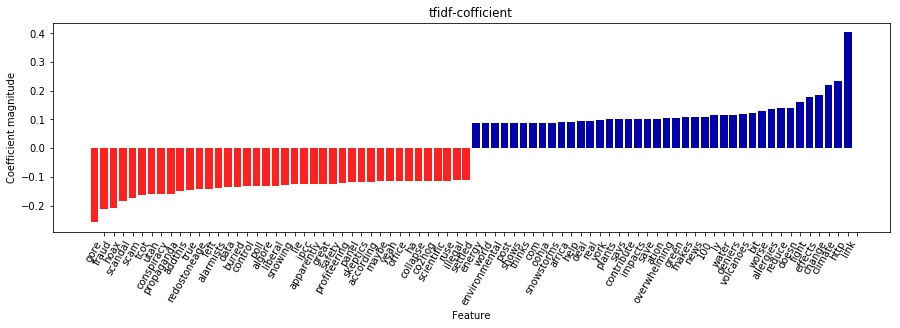

In [62]:
import mglearn 
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_, 
                                   feature_names, n_top_features=40)
plt.title("tfidf-cofficient")

## Ngrams
#### often single word is misleading predictor. For example, "like" and "don't like" are opposite

In [63]:
pipe = make_pipeline(TfidfVectorizer(min_df=3, stop_words='english'), logreg)
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
logreg_train = grid.fit(tweets_train, y_train)

# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(tweets_test)
print("accuracy is: ", grid.score(tweets_test, y_test))
confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix \n", confusion)

accuracy is:  0.822904368359
confusion matrix 
 [[128  98]
 [ 52 569]]


In [64]:
print(grid.best_estimator_)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


C:\Users\sande\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


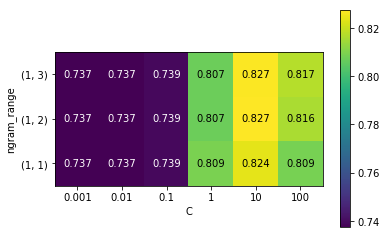

In [65]:
scores = [s.mean_validation_score for s in grid.grid_scores_]
scores = np.array(scores).reshape(-1, 3).T

heatmap = mglearn.tools.heatmap(scores, xlabel="C", ylabel="ngram_range", 
                                xticklabels=param_grid['logisticregression__C'], 
                                yticklabels=param_grid['tfidfvectorizer__ngram_range'], 
                                cmap='viridis', fmt="%.3f")
plt.colorbar(heatmap);

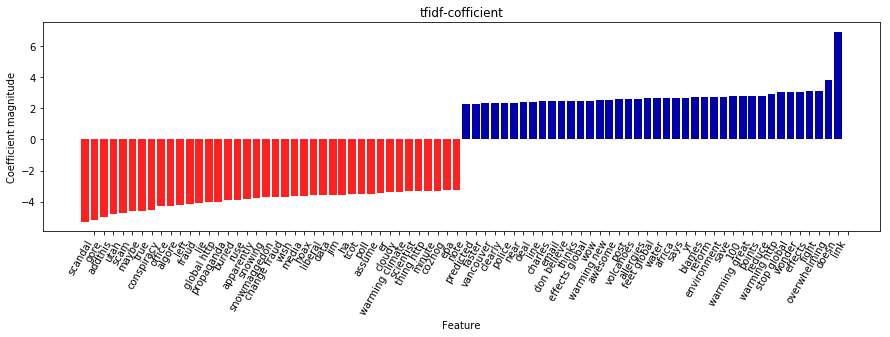

In [66]:
feature_names = np.array(grid.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef,feature_names, n_top_features=40)
plt.title("tfidf-cofficient")